In [15]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
from torchvision import models
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms
import cv2
import torch.nn.functional as F
import os 
import glob

In [27]:
# loading the model 
model = torch.load('model.pth')
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
class_names = ['less_damage', 'not_damage', 'severly_damage']


In [39]:
data_transforms = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.RandomHorizontalFlip(), 
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

print('data_transforms: ', data_transforms)

data_transforms:  Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [41]:
print('Classes: ', class_names)

Classes:  ['less_damage', 'not_damage', 'severly_damage']


Predicted as severly_damage with confidence of 98.35%


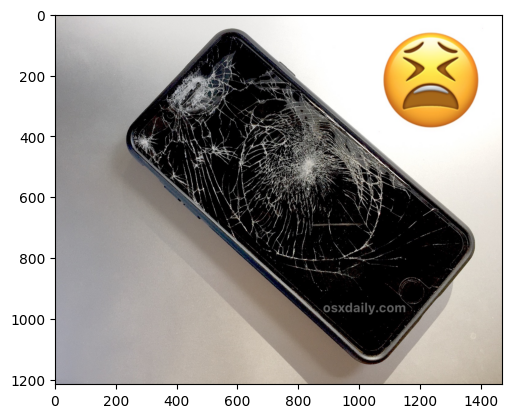

In [44]:
# Making a 'predict' function which would take the 'model' and the path of the 'test image' as inputs, and predict the class that the test image belongs to.
def predict(model, test_img_path):
    img = cv2.imread(test_img_path)

    # Visualizing the test image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    img = transforms.Compose([transforms.ToPILImage()])(img)    
    img = data_transforms(img)
    img = img.view(1, img.shape[0], img.shape[2], img.shape[2]) # Expanding dimension
    
    model.eval()
    with torch.no_grad():
        logits = model(img)
        
    probs = F.softmax(logits, dim = 1)
    max_prob, ind = torch.max(probs, 1)
    
    print('Predicted as {} with confidence of {}%'.format(class_names[ind], round(max_prob.item()*100, 2)))
    
#test_data_dir = '/content/drive/MyDrive/train_dir/test/android_samsung/'
test_data_dir = 'test/iphone/'
test_img_list = []
for class_dir in glob.glob(test_data_dir + os.sep + '*'):
    test_img_list.append(class_dir)

# Loading the trained model(architecture as well as the weights) for making inferences
#model = torch.load('model.pth')

# Select the test image index(choose a number from 0 to 6)
test_img_index = 32
predict(model, test_img_list[test_img_index])